In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pylab

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid

# Part 1: Introduction/Exploratory Data Analysis

In [93]:
df = pd.read_csv('MLF_GP2_EconCycle.csv')
df = df.drop(columns = ['Date'], axis = 1) # We are not using it as a time series dataset
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [94]:
df.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,79.210000,0.020297,0.036636,0.050174


In [95]:
df.shape

(223, 16)

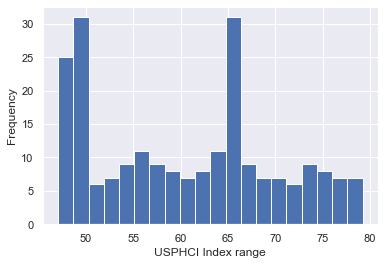

In [96]:
#Histogram to plot the USPHCI index over the years
sns.set()
plt.hist(df['USPHCI'], bins =20)
plt.xlabel('USPHCI Index range')
plt.ylabel('Frequency')
plt.show()

There are more USPHCI Indexes under 50 and near 65, compared to other ranges. We don't know the reason behind it but clearly USPHCI Index is not normally distributed. 

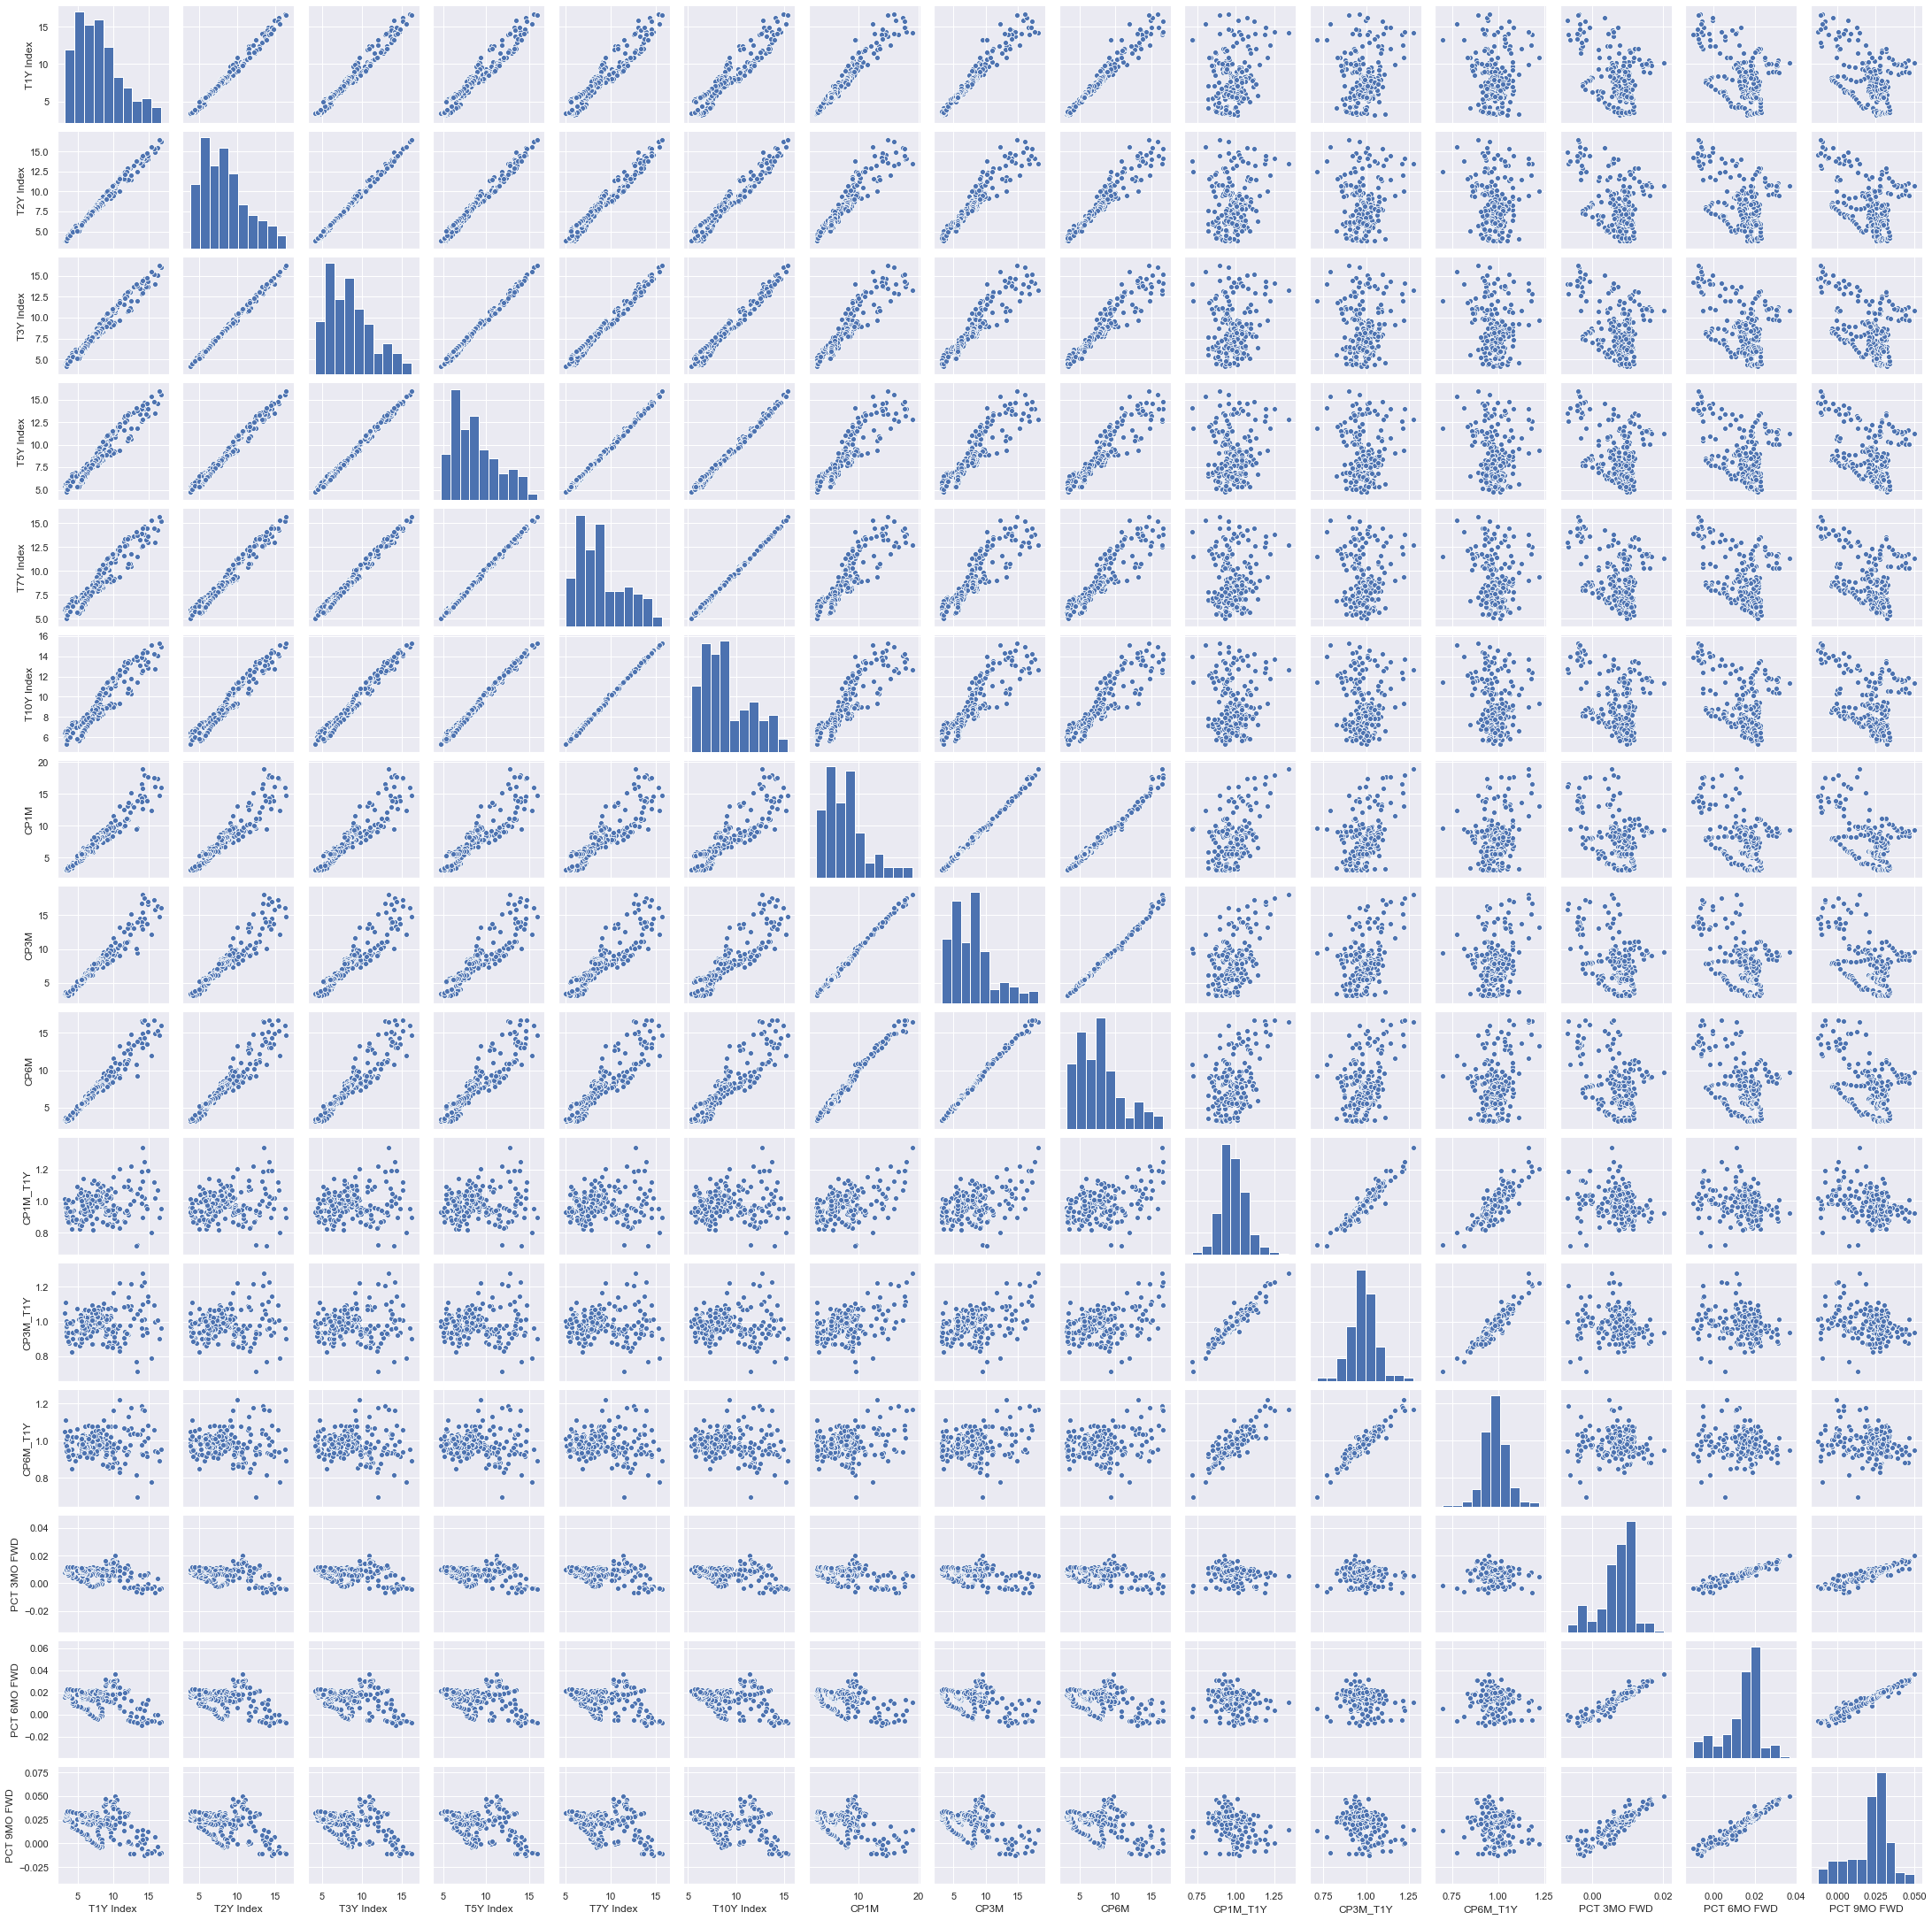

In [97]:
#Scatterplot Matrix

#Feature names
Xcols=['T1Y Index','T2Y Index','T3Y Index','T5Y Index','T7Y Index','T10Y Index','CP1M','CP3M','CP6M','CP1M_T1Y','CP3M_T1Y','CP6M_T1Y']
#Target names
ycols = ['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD']

sns.pairplot(df[Xcols+ycols], height=2)
plt.show()

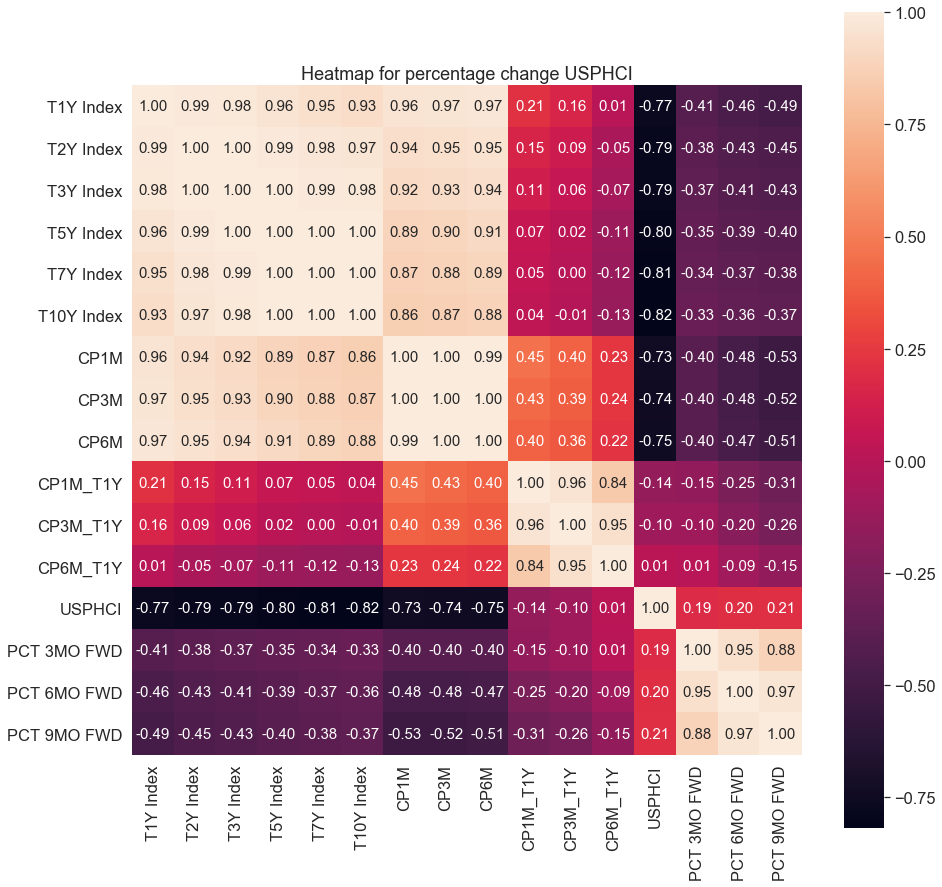

In [98]:
#Heatmap
hm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
sns.heatmap(hm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=df.columns, xticklabels=df.columns)
plt.gcf().set_size_inches(15, 15)
plt.title("Heatmap for percentage change USPHCI")
plt.show()

From the above two charts, focusing on the relationship between features and target variables (last three rows or columns), we can see a clear negative relationship bewtween Treasury yields (T*Y Index), Commercial Paper yields(CP*M) with percentage change in USPHCI (PCT *MO FWD). However, we cannot observe linear or other simple relationship between the features and the targets.

We can obverve strong linear positive relationship among related features (e.g., CP1M vs. CP6M), and targets (e.g., PCT 3MO FWD vs. PCT 9MO FWD). Also, Treasury yields (T*Y Index) seem to have linear positive relationship with Commercial Paper yields (CP*M), with non-trivial variances.

((array([-2.73664543, -2.43081203, -2.25682547, -2.13241267, -2.03424508,
         -1.95248335, -1.88200896, -1.81980469, -1.76393628, -1.71308631,
         -1.66631537, -1.62292906, -1.58239895, -1.54431319, -1.50834429,
         -1.47422735, -1.44174493, -1.41071625, -1.3809893 , -1.35243498,
         -1.32494269, -1.2984169 , -1.27277451, -1.24794275, -1.22385753,
         -1.20046208, -1.17770587, -1.15554372, -1.13393505, -1.11284327,
         -1.09223527, -1.07208099, -1.05235303, -1.03302635, -1.01407803,
         -0.99548698, -0.97723378, -0.9593005 , -0.94167055, -0.92432853,
         -0.90726014, -0.89045206, -0.87389185, -0.8575679 , -0.84146933,
         -0.82558593, -0.80990814, -0.79442694, -0.77913384, -0.76402082,
         -0.74908033, -0.73430521, -0.71968868, -0.70522432, -0.69090602,
         -0.67672798, -0.66268469, -0.6487709 , -0.63498159, -0.62131197,
         -0.60775748, -0.59431375, -0.58097658, -0.56774196, -0.55460605,
         -0.54156515, -0.52861571, -0.

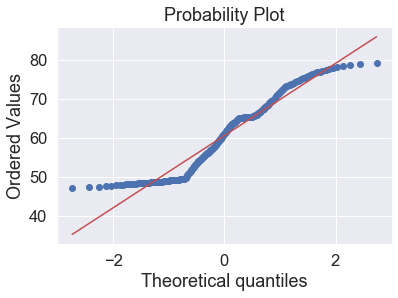

In [108]:
pp_data = df.loc[:,'USPHCI'] 
stats.probplot(pp_data, dist='norm',plot=pylab)

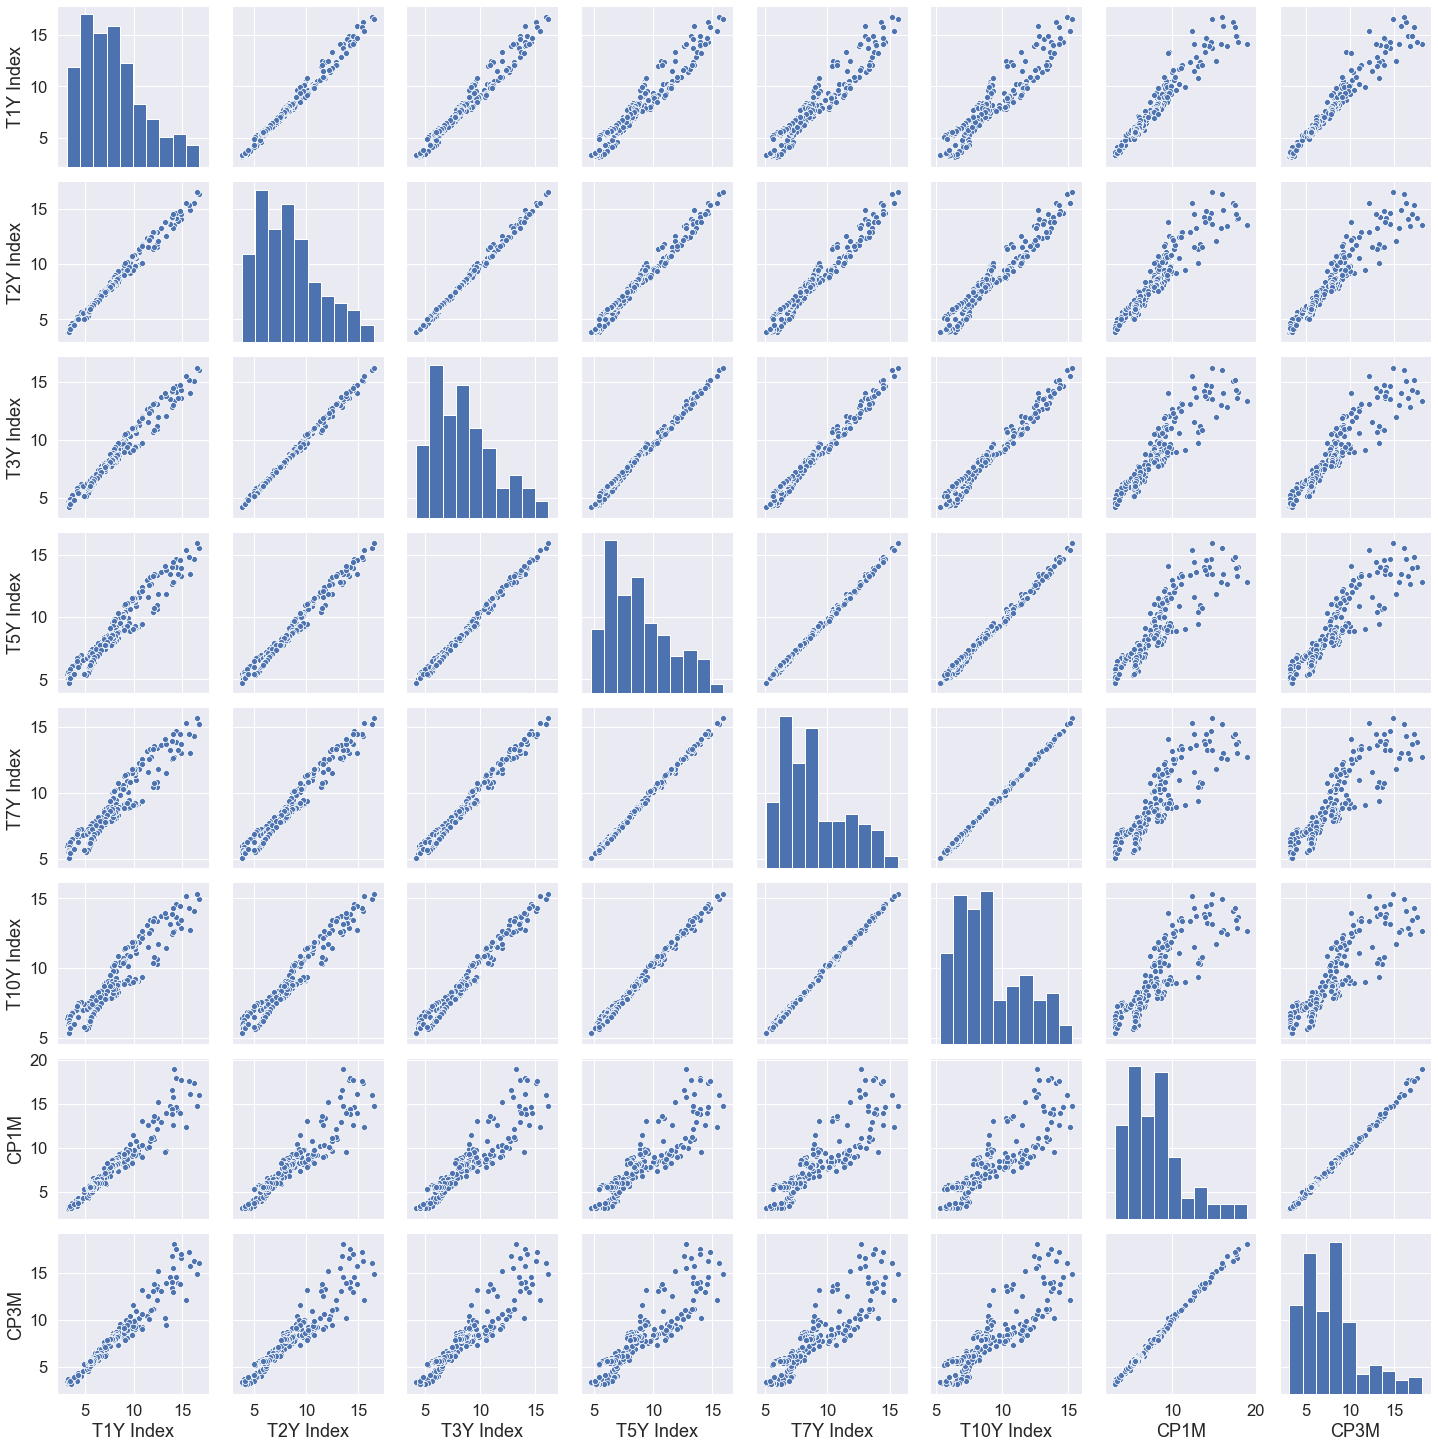

In [107]:
# Pairplot
sns.pairplot(X.iloc[:,0:8])
plt.show()

# Part 2: Preprocessing, feature extraction, feature selection

In [8]:
X=df[Xcols] #feature data
y=df[ycols] #target data

In [9]:
#Try to find invalid values
df.isnull().values.any()

False

We do not have any Null values. By obseving the data, we find a value of 0 in the 'PCT 9MO FWD' '11/30/1979' cell. However, because the corespening USPHCI is exactly the same as 9 months forward, it is a valid entry. Thus, we don't find any obverious wrong entries in our data set.

In [10]:
#Standardization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_std=StandardScaler().fit_transform(X_train)
X_test_std=StandardScaler().fit_transform(X_test)

y_train_std=StandardScaler().fit_transform(y_train)
y_test_std = StandardScaler().fit_transform(y_test)

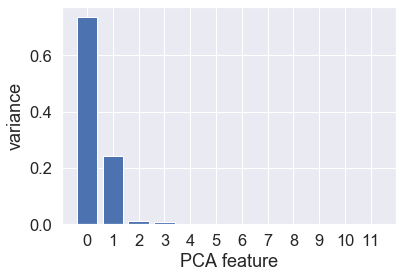

[0.73587646 0.97688091 0.98951082 0.99852006 0.99940413 0.99975852
 0.9998894  0.99995623 0.99998173 0.99999116 0.9999987  1.        ]


In [11]:
#PCA - feature selection
pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print(np.cumsum(pca.explained_variance_ratio_))

In [12]:
#We choose the PCA components as 3 so that we can have 98.9% of the variance
pca=PCA(n_components = 3)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
y1_train= y_train_std[:,0]
y2_train=y_train_std[:,1]
y3_train=y_train_std[:,2]
y1_test=y_test_std[:,0]
y2_test=y_test_std[:,1]
y3_test=y_test_std[:,2]
print(np.cumsum(pca.explained_variance_ratio_))

[0.73587646 0.97688091 0.98951082]


In [13]:
print(pd.DataFrame(pca.components_,columns=Xcols,index = ['PC-1','PC-2','PC-3']))

      T1Y Index  T2Y Index  T3Y Index  T5Y Index  T7Y Index  T10Y Index  \
PC-1   0.331455   0.330052   0.327332   0.321089   0.316680    0.313218   
PC-2   0.060406   0.109202   0.133184   0.164986   0.178004    0.185713   
PC-3   0.267799   0.065017  -0.058314  -0.219582  -0.313716   -0.374835   

          CP1M      CP3M      CP6M  CP1M_T1Y  CP3M_T1Y  CP6M_T1Y  
PC-1  0.329709  0.330964  0.332191  0.133459  0.132451  0.092824  
PC-2 -0.087612 -0.079216 -0.062769 -0.521158 -0.539119 -0.541431  
PC-3  0.305184  0.228478  0.127665  0.302361 -0.043534 -0.615277  


# Part 3 & 4: Model fitting and evaluation & Hyperparameter tuning

In [68]:
#Decision Tree
paras = [2,3,4,5,6,7,8,9,10,25]
scores = np.zeros((3,len(paras)))
rmses = np.zeros((3,len(paras)))

p_idx = 0
for p in paras:
    dt = DecisionTreeRegressor(max_depth=p)
    for i in range(3):
        dt.fit(X_train_pca,y_train_std[:,i])
        y_pred=dt.predict(X_test_pca)
        sc = dt.score(X_test_pca, y_test_std[:,i])
        scores[i][p_idx] = sc
        rmse = np.sqrt(mean_squared_error(y_test_std[:,i],y_pred))
        rmses[i][p_idx] = rmse
    p_idx += 1

    
for i in range(3):   
    best_idx = np.argmax(scores[i])    
    print ('The best score of ',ycols[i], ' is ', scores[i][best_idx])
    print ('with the best parameters (max_depth) are ',paras[best_idx])
    print ('with Root Mean Squared Error of', rmses[i][best_idx],'\n')
    

The best score of  PCT 3MO FWD  is  0.20282158283787632
with the best parameters (max_depth) are  2
with Root Mean Squared Error of 0.892848484997384 

The best score of  PCT 6MO FWD  is  0.2640447227052497
with the best parameters (max_depth) are  2
with Root Mean Squared Error of 0.8578783580990665 

The best score of  PCT 9MO FWD  is  0.4116380710927947
with the best parameters (max_depth) are  3
with Root Mean Squared Error of 0.7670475401871811 



In [71]:
# KNN
paras = [2,3,4,5,6,7,8,9,10,25]
scores = np.zeros((3,len(paras)))
rmses = np.zeros((3,len(paras)))

p_idx = 0
for p in paras:
    knn = KNeighborsRegressor(n_neighbors=p)
    for i in range(3):
        knn.fit(X_train_pca,y_train_std[:,i])
        y_pred=knn.predict(X_test_pca)
        sc = knn.score(X_test_pca, y_test_std[:,i])
        scores[i][p_idx] = sc
        rmse = np.sqrt(mean_squared_error(y_test_std[:,i],y_pred))
        rmses[i][p_idx] = rmse
    p_idx += 1
        
for i in range(3):   
    best_idx = np.argmax(scores[i])    
    print ('The best score of ',ycols[i], ' is ', scores[i][best_idx])
    print ('with the best parameters(k value) are ',paras[best_idx])
    print ('with Root Mean Squared Error of', rmses[i][best_idx],'\n')

The best score of  PCT 3MO FWD  is  0.4011405590914201
with the best parameters(k value) are  5
with Root Mean Squared Error of 0.7738600913011214 

The best score of  PCT 6MO FWD  is  0.5296469636486895
with the best parameters(k value) are  3
with Root Mean Squared Error of 0.6858228899295433 

The best score of  PCT 9MO FWD  is  0.6062085725147651
with the best parameters(k value) are  3
with Root Mean Squared Error of 0.6275280292427063 



In [77]:
#SVR
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,'kernel': ['linear']}, 
              {'C': param_range,'gamma': param_range, 
               'kernel': ['rbf']}]    

svr = SVR()
for i in range(3):
    score = []
    for g in ParameterGrid(param_grid):
        svr.set_params(**g)
        svr.fit(X_train_pca,y_train_std[:,i])
        svr_in_sample_accuracy = svr.score(X_train_pca,y_train_std[:,i])
        svr_out_sample_accuracy = svr.score(X_test_pca,y_test_std[:,i])
        score.append(svr_out_sample_accuracy)
    best_idx = np.argmax(score)
    print ('The best parameters are ',ParameterGrid(param_grid)[best_idx])
    print ('The best score of ',ycols[i], ' is ', score[best_idx],'\n')

The best parameters are  {'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}
The best score of  PCT 3MO FWD  is  0.42004113985481206 

The best parameters are  {'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}
The best score of  PCT 6MO FWD  is  0.48837402968067234 

The best parameters are  {'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}
The best score of  PCT 9MO FWD  is  0.5771767618317277 



# Part 5: Ensembling

### Random Forest Regressor with 3 Principle Components

In [73]:
rfr = RandomForestRegressor()
grid = {'n_estimators': [100,200,300,400],
'max_depth': [2,3,4,5,6]}

for i in range(3):
    score = []
    for g in ParameterGrid(grid):
        rfr.set_params(**g)
        rfr.fit(X_train_pca,y_train_std[:,i])
        rfr_in_sample_accuracy = rfr.score(X_train_pca,y_train_std[:,i])
        rfr_out_sample_accuracy = rfr.score(X_test_pca,y_test_std[:,i])
        score.append(rfr_out_sample_accuracy)
    best_idx = np.argmax(score)
    print ('The best parameters are ',ParameterGrid(grid)[best_idx])
    print ('The best score of ',ycols[i], ' is ', score[best_idx],'\n')

The best parameters are  {'n_estimators': 200, 'max_depth': 2}
The best score of  PCT 3MO FWD  is  0.22373762564636976 

The best parameters are  {'n_estimators': 100, 'max_depth': 3}
The best score of  PCT 6MO FWD  is  0.3550157442485181 

The best parameters are  {'n_estimators': 300, 'max_depth': 4}
The best score of  PCT 9MO FWD  is  0.4434836531155555 

